**First Dataset**<br>
First we import the data and the necessary python packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"RootCellAtlas2.0.geneexpression_averaged.csv"
)  # Import the RootCellAtlas Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39578 entries, 0 to 39577
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gene             39578 non-null  object 
 1   PSE_e2           39578 non-null  float64
 2   PSE_e1           39578 non-null  float64
 3   PSE_t            39578 non-null  float64
 4   PSE_m2           39578 non-null  float64
 5   PSE_m1           39578 non-null  float64
 6   PPP_d            39578 non-null  float64
 7   PPP_e2           39578 non-null  float64
 8   PPP_e1           39578 non-null  float64
 9   PPP_t            39578 non-null  float64
 10  PPP_m2           39578 non-null  float64
 11  PPP_m1           39578 non-null  float64
 12  Columella        39578 non-null  float64
 13  C1               39578 non-null  float64
 14  LRP              39578 non-null  float64
 15  Unknown          39578 non-null  float64
 16  LRC              39578 non-null  float64
 17  Dying_LRC   

We then seperate the data and labels, and quickly do some inspection.

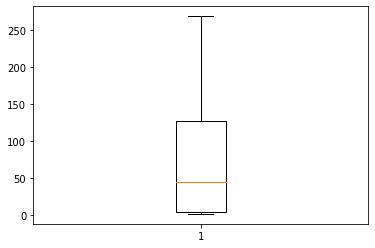

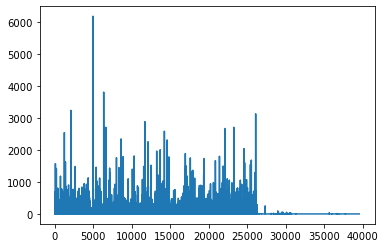

(39578, 84)


In [2]:
cell_names = np.array(df.columns)[1:]  # Getting the names of the cells
gene_names = np.array(df.values[:, 0])  # Getting the names of the genes
data = np.array(
    df.values[:, 1:]
)  # Getting the concentration ratios of each gene in each cell stage
plt.boxplot(data[4951])
plt.show()

# row 4951 (AT1G62480) has biggest total concentration in all cell stages
row_sums = np.sum(
    data, axis=1
)  # Getting the totals of the concentrations for each gene
plt.plot(row_sums)
plt.show()
# Columns add up to 10000
print(data.shape)

We then remove the rows with only 0 values.

In [3]:
# 9007 have only 0 values, so let's remove them
gene_names = gene_names[
    np.where(row_sums > 0)[0]
]  # Filter out all rows with 0 concentration in all cell stages
filt_data = data[
    np.where(row_sums > 0)[0]
]  # Filter out all rows with 0 concentration in all cell stages
print(len(gene_names))
print(filt_data.shape)

30571
(30571, 84)


**Second Dataset**

In [4]:
df2 = pd.read_csv(
    r"all_TF_targets.csv", sep="\t"
)  # Reads the CSV file into a dataframe
print(df2.columns)

Index(['TF TAIR ID', 'PeakSetName', 'TF name', 'AT1G01010', 'AT1G01020',
       'AT1G01030', 'AT1G01040', 'AT1G01046', 'AT1G01050', 'AT1G01060',
       ...
       'AT5G67550', 'AT5G67560', 'AT5G67570', 'AT5G67580', 'AT5G67590',
       'AT5G67600', 'AT5G67610', 'AT5G67620', 'AT5G67630', 'AT5G67640'],
      dtype='object', length=32543)


In [5]:
# calculating ammount of genes per TF
from tkinter import Variable


row_sums = df2.iloc[:, 3:].sum(axis=1)

# making the new dataframe
rows_df = pd.DataFrame({"TF name": df2.iloc[:, 2], "genes per TF": row_sums})

# sorting the df and converting to array for visualisation
rows_df = rows_df.sort_values(by="genes per TF", ascending=False)
# rows_df = np.array(rows_df)
head_rows_df = rows_df
print(head_rows_df)

       TF name  genes per TF
206     DOF2.2         23835
590        HB5         22574
456      PEAR2         22437
533        GFR         22181
91       REM19         21579
..         ...           ...
509      PUCHI           150
569       TRP1           139
230  AT2G38090           132
253       TCP9           119
345       TRP2            88

[608 rows x 2 columns]


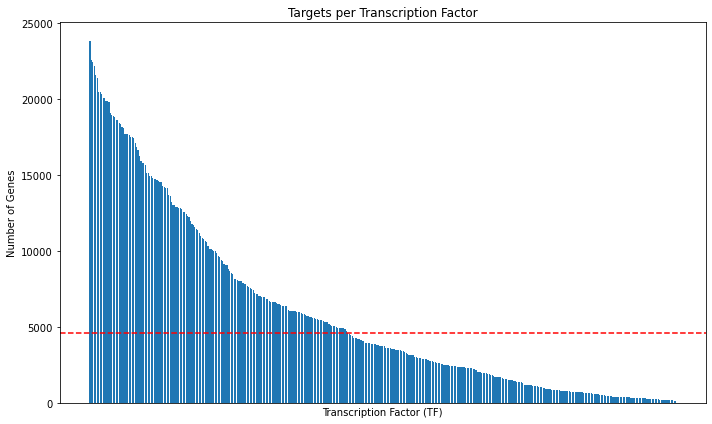

In [6]:
# visualisation of the data
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(head_rows_df["TF name"], head_rows_df["genes per TF"])

# Adding a mean line
plt.axhline(
    y=np.nanmean(head_rows_df["genes per TF"]),
    color="red",
    linestyle="--",
    label="Mean",
)

# Customize the plot (add labels, title, etc.)
plt.xlabel("Transcription Factor (TF)")
plt.ylabel("Number of Genes")
plt.title("Targets per Transcription Factor")

# Rotate x-axis labels for better readability
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
# calculating amount of genes per TF
col_sums = df2.iloc[:, 3:].sum()

# making the new dataframe
col_df = pd.DataFrame({"Targets": col_sums.index, "TFs per target": col_sums.values})

# sorting the df and converting to array for visualistion
col_df = col_df.sort_values(by="TFs per target", ascending=False)
np.array(col_df)
head_col_df = col_df
print(col_df)

         Targets  TFs per target
8653   AT2G01010             415
8955   AT2G03855             412
17977  AT3G41768             367
17976  AT3G41762             324
17978  AT3G41979             320
...          ...             ...
6104   AT1G56880               0
6103   AT1G56870               0
6102   AT1G56860               0
6101   AT1G56850               0
6141   AT1G57250               0

[32540 rows x 2 columns]


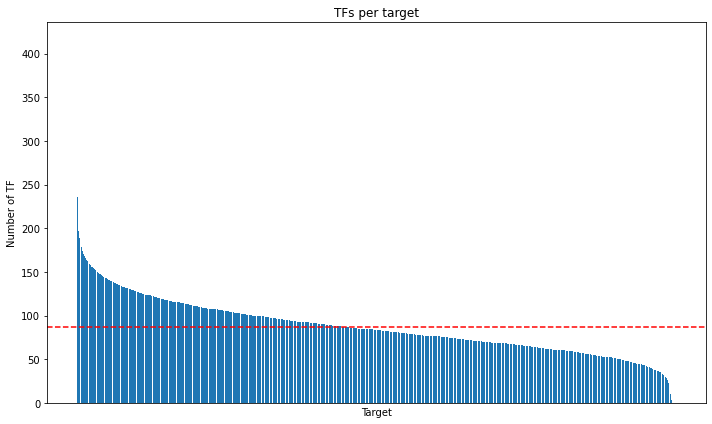

In [8]:
# visualisation of the data
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(head_col_df["Targets"], head_col_df["TFs per target"])

# Adding a mean line
plt.axhline(
    y=np.nanmean(head_col_df["TFs per target"]),
    color="red",
    linestyle="--",
    label="Mean",
)

# Customize the plot (add labels, title, etc.)
plt.xlabel("Target")
plt.ylabel("Number of TF")
plt.title("TFs per target")

# Rotate x-axis labels for better readability
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Transforming the dataframe into numpy arrays
gene_names2 = np.array(df2.columns)[3:]  # Getting the target gene names
TF_TAIR_IDs = df2.values[:, 0]  # Getting the TAIR IDs of the transcription factors
peak_set_names = df2.values[:, 1]  # Getting the peak set names
tf_names = df2.values[:, 2]  # Getting the transcription factor names
data2 = df2.values[:, 3:]  # Getting which transcription factor binds to which target

In [10]:
seen = set()
dups = [
    x for x in tf_names if x in seen or seen.add(x)
]  # Gets a list of all the duplicate tf names
tf_dup_indices = np.where(np.isin(tf_names, dups))[
    0
]  # Gets the indices of the duplicate tf names
tf_colamp_indices = [
    i for i, s in enumerate(peak_set_names) if "_colamp_a" in s
]  # Gets the indices of all tf with colamp_a in the peak set name
tf_colamp_dup = sorted(
    list(set(tf_dup_indices) & set(tf_colamp_indices))
)  # Gets the common indices between the previous two indices lists
tf_indices = list(
    set([i for i in range(len(tf_names))]) - set(tf_colamp_dup)
)  # Gets the indices that are not part of the previous indices list

data2 = data2[tf_indices, :]  # Filters out the TF rows with the previous indices list
TF_TAIR_IDs = TF_TAIR_IDs[
    tf_indices
]  # Filters out the TF TAIR IDs with the previous indices list

The gene concentration in cells needs to be attributed to each TF_name and peak_set_names.
This will allow correlating the cell concentrations per TF_name by calculating pearsons r.
with Pearsons r data we can find the most important TF_name and which are inhibitory or excitory


In [11]:
common_genes = np.array(
    list(set(gene_names) & set(gene_names2))
)  # Names of all common genes
tf_genes = np.array(
    list(set(common_genes) & set(TF_TAIR_IDs))
)  # Names of all tf genes that are also in common_genes

gene_names_idx = np.where(np.isin(gene_names, common_genes))[
    0
]  # Indices of where common genes are in row_names
gene_names2_idx = np.where(np.isin(gene_names2, common_genes))[
    0
]  # Indices of where common genes are in column_names2
row_names_tf_idx = np.where(np.isin(gene_names, tf_genes))[
    0
]  # Indices of where tf_genes are in row_names
TF_TAIR_IDs_tf_idx = np.where(np.isin(TF_TAIR_IDs, tf_genes))[
    0
]  # Indices of where tf_genes are in TF_TAIR_IDs

Next we change the data to only include common genes

In [12]:
data_updated = filt_data[gene_names_idx]  # Get data from where rows are common genes
gene_names_updated = gene_names[
    gene_names_idx
]  # Get row names from where rows are common genes
data_updated = data_updated[np.argsort(gene_names_updated)]  # Sorted by rows
gene_names_updated = gene_names_updated[
    np.argsort(gene_names_updated)
]  # Sorted by rows

tf_genes_data = filt_data[
    row_names_tf_idx
]  # Get data from where rows are tf in common genes
tf_genes_names = gene_names[
    row_names_tf_idx
]  # Get row names from where rows are tf in common genes

data2_updated = data2[
    :, gene_names2_idx
]  # Get data 2 from where columns are common genes
data2_updated = data2_updated[
    TF_TAIR_IDs_tf_idx
]  # Get data 2 from where rows are common genes
gene_names2_updated = gene_names2[
    gene_names2_idx
]  # Get column names 2 from where columns are common genes
TF_TAIR_IDs_updated = TF_TAIR_IDs[
    TF_TAIR_IDs_tf_idx
]  # Get row names 2 from where rows are common genes

In [13]:
def vcorrcoef(X, y):  # Made by JON HERMAN
    # Calculates the correlation coeficients over the rows of the matrix X with vector y using numpy arrays for vectorization
    Xm = np.reshape(np.mean(X, axis=1), (X.shape[0], 1))
    ym = np.mean(y)
    r_num = np.sum((X - Xm) * (y - ym), axis=1)
    r_den = np.sqrt(np.sum((X - Xm) ** 2, axis=1) * np.sum((y - ym) ** 2))
    r = r_num / r_den
    return r

Next we calculate the correlations of each TF with their respective targets:

In [14]:
corr_dist = [None] * len(TF_TAIR_IDs_updated)  # Create empty list of length #TFs
for tf_i, tf_gene_name in enumerate(TF_TAIR_IDs_updated):
    tf = np.squeeze(
        tf_genes_data[tf_genes_names == tf_gene_name]
    )  # Get the TF concentration ratios
    bindings_data = data_updated[np.where(data2_updated[tf_i])].astype(
        float
    )  # Get the concentration ratios of each target of the respective TF
    corr_dist[tf_i] = vcorrcoef(
        bindings_data, tf
    )  # Calculate the correlations between the TF and their targets
corr_dist = np.array(corr_dist)  # Convert the final product into an numpy array
np.save("corr_dist", corr_dist)  # Save the correlation data in .npy file

C:\Users\reubi\AppData\Local\Temp/ipykernel_10024/3324735492.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corr_dist = np.array(corr_dist) # Convert the final product into an numpy array


In [15]:
count_higher_midmax = np.array(
    [len(i[i > (np.max(i) + np.mean(i)) / 2]) for i in corr_dist]
)  # Gets the amount of correlations above the average between the mean and maximum correlations for each TF
count_lower_midmin = np.array(
    [len(i[i < (np.min(i) + np.mean(i)) / 2]) for i in corr_dist]
)  # Gets the amount of correlations below the average between the mean and minimum correlations for each TF
corr_dist_means = [
    np.mean(i) for i in corr_dist
]  # Gets the means of the correlations for each TF
corr_dist_max = [
    np.max(i) for i in corr_dist
]  # Gets the maximums of the correlations for each TF
corr_dist_min = [
    np.min(i) for i in corr_dist
]  # Gets the minimums of the correlations for each TF
corr_dist_flat = np.array(
    [x for xs in corr_dist for x in xs]
)  # Gets the flattened version of all TF correlations

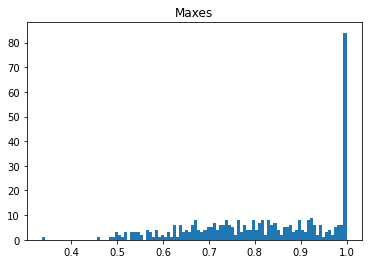

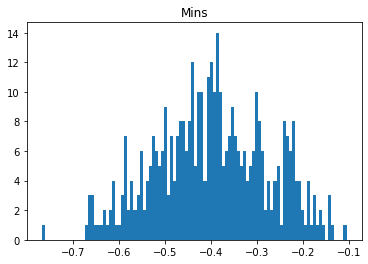

In [16]:
# Plotting a histogram of the maximum correlation values of each TF
plt.hist(corr_dist_max, bins=100)
plt.title("Maxes")
plt.show()

# Plotting a histogram of the minimum correlation values of each TF
plt.hist(corr_dist_min, bins=100)
plt.title("Mins")
plt.show()

In [17]:
def get_dist(corr_data, n):
    # Calculates the y and x values of the correlation probility distribution
    h = np.histogram(corr_data, bins=n, range=(-1, 1))
    return h[0] / np.sum(h[0]), np.convolve(h[1], [0.5, 0.5], "valid")

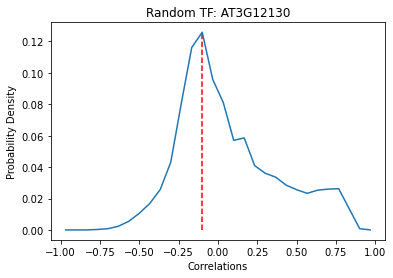

In [18]:
y, d = get_dist(
    corr_dist[np.argmax(count_higher_midmax)], 30
)  # Gets the correlations distribution of the TF with the highest count_higher_midmax value

# Plotting the distribution of the previous TF
plt.plot(d, y)
plt.vlines(d[np.argmax(y)], 0, np.max(y), "r", "--")
plt.xlabel("Correlations")
plt.ylabel("Probability Density")
plt.title("Random TF: " + str(TF_TAIR_IDs_updated[np.argmax(count_higher_midmax)]))
plt.show()

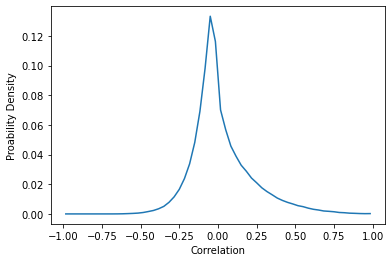

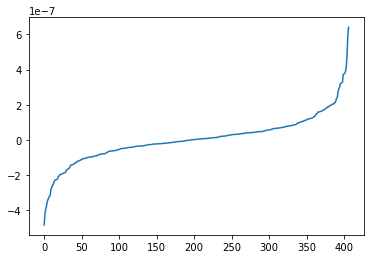

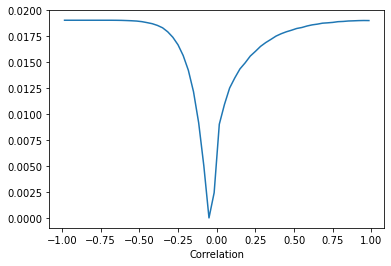

In [25]:
all_dist = np.array(
    [get_dist(corrs, 60) for corrs in corr_dist]
)  # Calculating the probability distributions for each TF
mean_dist = np.mean(
    all_dist[:, 0], axis=0
)  # Calculating the mean distribution of all TFs

# Calculating the inverse of the mean distribution of all TFs
inverse_mean_dist = np.max(mean_dist) - mean_dist
inverse_mean_dist = inverse_mean_dist / np.sum(inverse_mean_dist)

# Plotting the mean TF distribution
plt.plot(all_dist[0, 1], mean_dist)
plt.ylabel("Proability Density")
plt.xlabel("Correlation")
plt.show()

# Calculating the MSE (mean squared error)-like criterion.
# The difference of each correlation of each TF are reduced by the mean tf distribution, then muliplied by the respective
# correlation values and multiplied by the inverse of the mean TF distribution
all_dist_mse = np.mean(
    ((all_dist[:, 0] - mean_dist) ** 2) * all_dist[0, 1] * inverse_mean_dist, axis=1
)

all_dist_sorted = all_dist[:, 0][
    np.argsort(all_dist_mse)
]  # Get sorted TF distributions according to evaluation
TF_TAIR_IDs_sorted = TF_TAIR_IDs_updated[
    np.argsort(all_dist_mse)
]  # Get sorted TF names according to evaluation
np.save("all_dist_sorted", all_dist_sorted)  # Save all_dist_sorted as .npy file
np.save(
    "TF_TAIR_IDs_sorted", TF_TAIR_IDs_sorted
)  # Save TF_TAIR_IDs_sorted as .npy file

# Plotting the sorted evaluation based on the previous criterion for each TF
plt.plot(sorted(all_dist_mse))
plt.show()

# Plotting the inverse of the mean TF distribution
plt.plot(all_dist[0, 1], inverse_mean_dist)
plt.xlabel("Correlation")
plt.show()

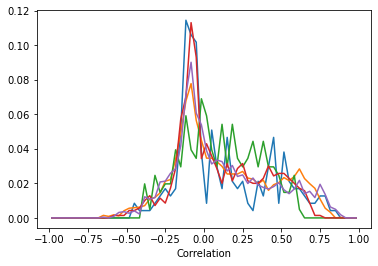

In [20]:
# Plotting the 5 highest evaluated TF distributions
for i in range(1, 6):
    plt.plot(all_dist[0, 1], all_dist[:, 0][np.argsort(all_dist_mse)[-i]])
plt.xlabel("Correlation")
plt.show()

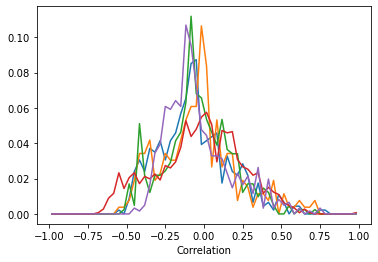

In [21]:
# Plotting the 5 lowest evaluated TF distributions
for i in range(0, 5):
    plt.plot(all_dist[0, 1], all_dist[:, 0][np.argsort(all_dist_mse)[i]])
plt.xlabel("Correlation")
plt.show()

Best activator:
['AT2G36010' 'AT4G31550' 'AT1G68550']
Best inhibitor:
['AT5G08130' 'AT5G64750' 'AT1G09540']


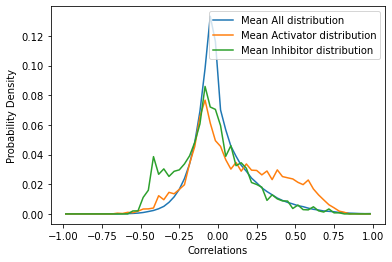

In [22]:
n = 3  # The number of TFs per category used in this code block

# Printing the n highest and n lowest evaluated TFs
print("Best activator:")
print(TF_TAIR_IDs_updated[np.argsort(all_dist_mse)[-n - 1 : -1]])
print("Best inhibitor:")
print(TF_TAIR_IDs_updated[np.argsort(all_dist_mse)[0:n]])

plt.plot(
    all_dist[0, 1], mean_dist, label="Mean All distribution"
)  # Plotting the mean TF distribution
plt.plot(
    all_dist[0, 1],
    np.mean(all_dist[:, 0][np.argsort(all_dist_mse)[-n - 1 : -1]], axis=0),
    label="Mean Activator distribution",
)  # Plot the average distribution of the n highest evaluated TFs
plt.plot(
    all_dist[0, 1],
    np.mean(all_dist[:, 0][np.argsort(all_dist_mse)[0:n]], axis=0),
    label="Mean Inhibitor distribution",
)  # Plot the average distribution of the n lowest evaluated TFs
plt.xlabel("Correlations")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

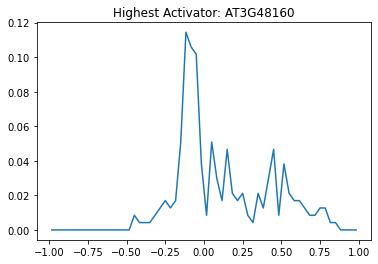

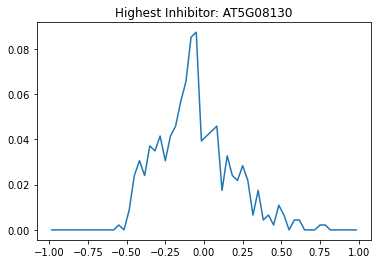

In [23]:
# Plotting the highest evaluated TF distribution
plt.plot(all_dist[0, 1], all_dist[:, 0][np.argmax(all_dist_mse)])
plt.title("Highest Activator: " + str(TF_TAIR_IDs_updated[np.argmax(all_dist_mse)]))
plt.show()

# Plotting the lowesst evaluated TF distribution
plt.plot(all_dist[0, 1], all_dist[:, 0][np.argmin(all_dist_mse)])
plt.title("Highest Inhibitor: " + str(TF_TAIR_IDs_updated[np.argmin(all_dist_mse)]))
plt.show()